# Neural Networks with Momentum


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

%matplotlib inline
torch.manual_seed(1)
np.random.seed(1)

In [2]:
# Define a function for plot the decision region


def plot_decision_regions_3class(model, data_set):
    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#00AAFF"])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#00AAFF"])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    XX = torch.torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    _, yhat = torch.max(model(XX), 1)
    yhat = yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:] == 0, 0], X[y[:] == 0, 1], "ro", label="y=0")
    plt.plot(X[y[:] == 1, 0], X[y[:] == 1, 1], "go", label="y=1")
    plt.plot(X[y[:] == 2, 0], X[y[:] == 2, 1], "o", label="y=2")
    plt.title("decision region")
    plt.legend()

In [3]:
# Create the dataset class


class Data(Dataset):

    # modified from: https://cs231n.github.io/neural-networks-case-study/
    # Constructor
    def __init__(self, K=3, N=500):
        D = 2
        X = np.zeros((N * K, D))  # data matrix (each row = single example)
        y = np.zeros(N * K, dtype="uint8")  # class labels
        for j in range(K):
            ix = range(N * j, N * (j + 1))
            r = np.linspace(0.0, 1, N)  # radius
            t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
            X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
            y[ix] = j

        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = y.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

    # Plot the diagram
    def plot_data(self):
        plt.plot(
            self.x[self.y[:] == 0, 0].numpy(),
            self.x[self.y[:] == 0, 1].numpy(),
            "o",
            label="y=0",
        )
        plt.plot(
            self.x[self.y[:] == 1, 0].numpy(),
            self.x[self.y[:] == 1, 1].numpy(),
            "ro",
            label="y=1",
        )
        plt.plot(
            self.x[self.y[:] == 2, 0].numpy(),
            self.x[self.y[:] == 2, 1].numpy(),
            "go",
            label="y=2",
        )
        plt.legend()

In [4]:
class Net(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))

    # Prediction
    def forward(self, activation):
        L = len(self.hidden)
        for l, linear_transform in zip(range(L), self.hidden):
            if l < L - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

In [5]:
def train(data_set, model, criterion, train_loader, optimizer, epochs=100):
    LOSS = []
    ACC = []
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        LOSS.append(loss.item())
        ACC.append(accuracy(model, data_set))

    results = {"Loss": LOSS, "Accuracy": ACC}
    fig, ax1 = plt.subplots()
    color = "tab:red"
    ax1.plot(LOSS, color=color)
    ax1.set_xlabel("epoch", color=color)
    ax1.set_ylabel("total loss", color=color)
    ax1.tick_params(axis="y", color=color)

    ax2 = ax1.twinx()
    color = "tab:blue"
    ax2.set_ylabel("accuracy", color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis="y", color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.show()
    return results

In [6]:
def accuracy(model, data_set):
    _, yhat = torch.max(model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

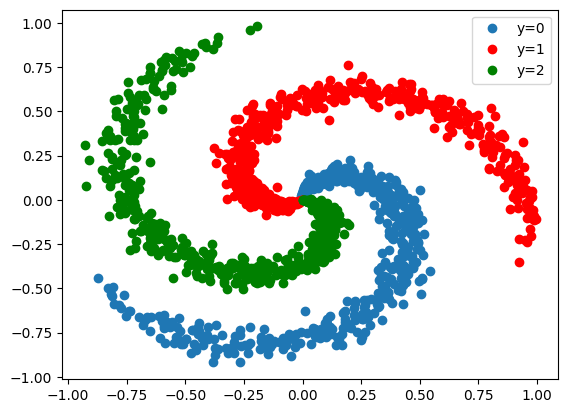

In [7]:
data_set = Data()
data_set.plot_data()
data_set.y = data_set.y.view(-1)

In [8]:
Results = {
    "momentum 0": {"Loss": 0, "Accuracy:": 0},
    "momentum 0.1": {"Loss": 0, "Accuracy:": 0},
}

Test with different `momentum` values


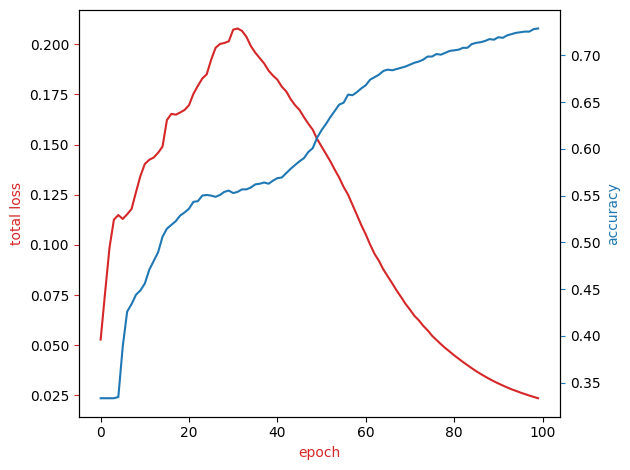

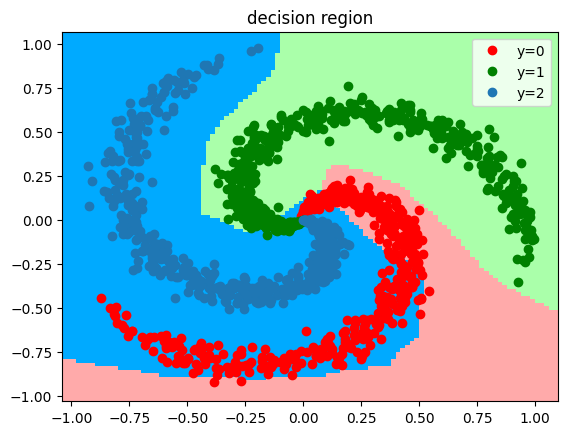

In [9]:
# Train a model with 1 hidden layer and 50 neurons

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results["momentum 0"] = train(
    data_set, model, criterion, train_loader, optimizer, epochs=100
)
plot_decision_regions_3class(model, data_set)

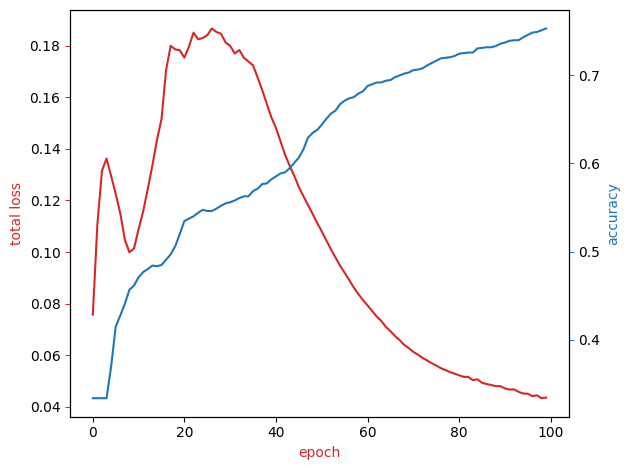

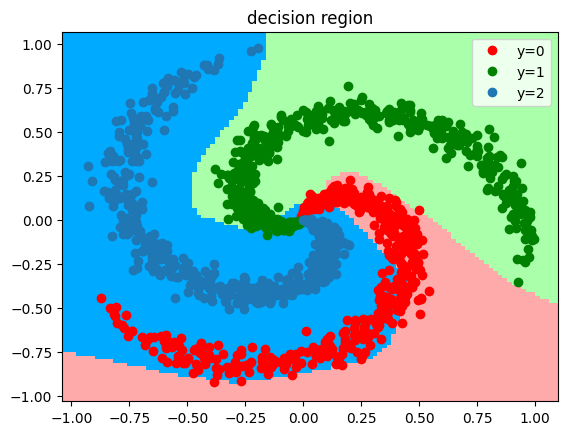

In [10]:
# Train a model with 1 hidden layer and 50 neurons with 0.1 momentum

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.1)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results["momentum 0.1"] = train(
    data_set, model, criterion, train_loader, optimizer, epochs=100
)
plot_decision_regions_3class(model, data_set)

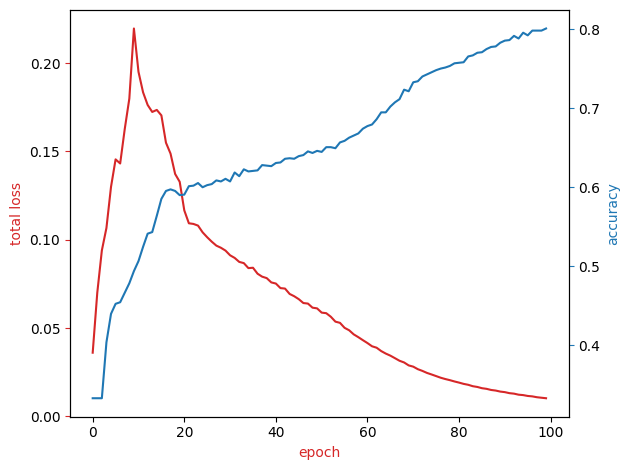

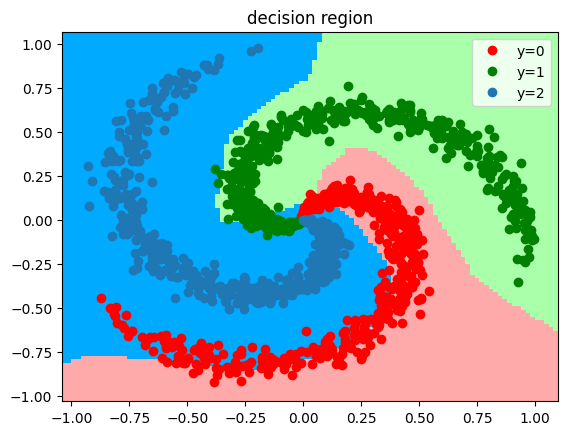

In [11]:
# Train a model with 1 hidden layer and 50 neurons with 0.2 momentum

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.2)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results["momentum 0.2"] = train(
    data_set, model, criterion, train_loader, optimizer, epochs=100
)
plot_decision_regions_3class(model, data_set)

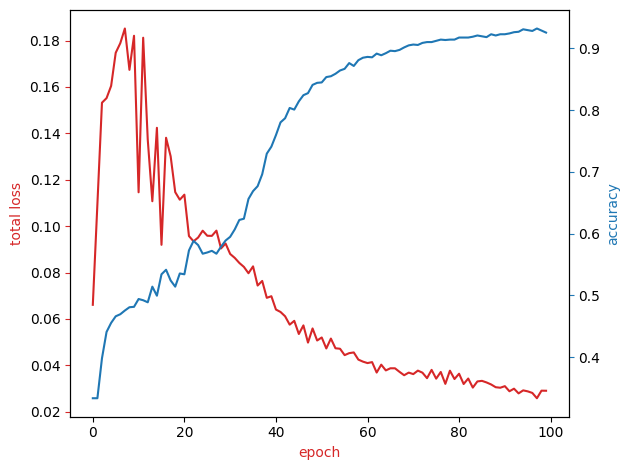

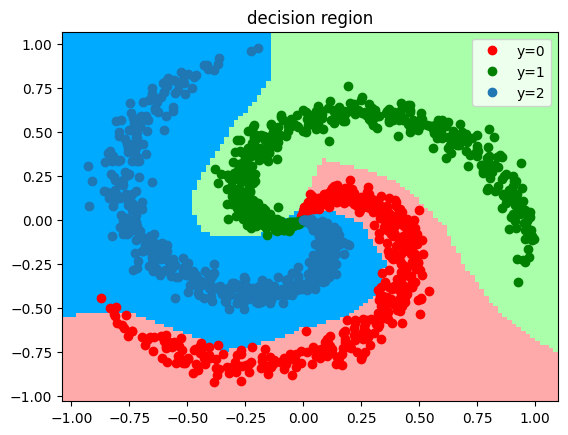

In [12]:
# Train a model with 1 hidden layer and 50 neurons with 0.4 momentum

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.4)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results["momentum 0.4"] = train(
    data_set, model, criterion, train_loader, optimizer, epochs=100
)
plot_decision_regions_3class(model, data_set)

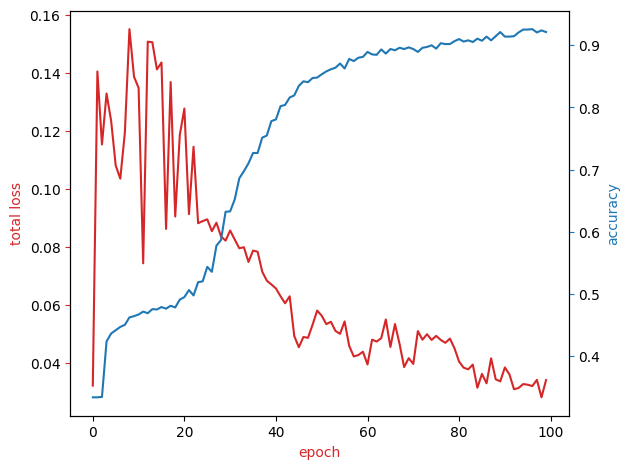

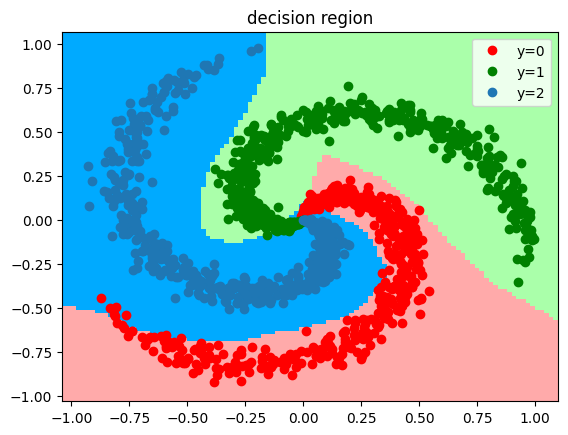

In [13]:
# Train a model with 1 hidden layer and 50 neurons with 0.5 momentum

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results["momentum 0.5"] = train(
    data_set, model, criterion, train_loader, optimizer, epochs=100
)
plot_decision_regions_3class(model, data_set)

Compare Results of Different Momentum Terms


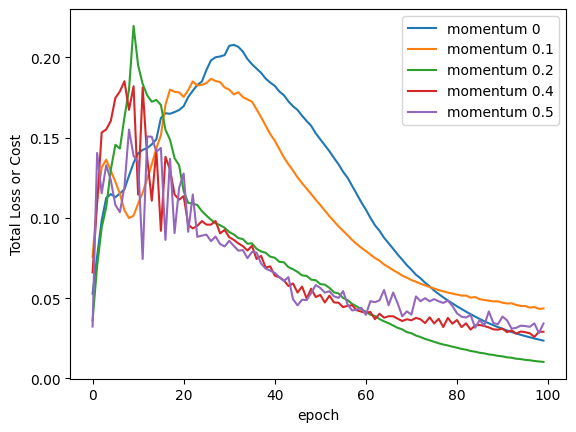

In [14]:
# Plot the Loss result for each term

for key, value in Results.items():
    plt.plot(value["Loss"], label=key)
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("Total Loss or Cost")

The plot below compares results of different momentum terms. We see that in general. The Cost decreases proportionally to the momentum term, but larger momentum terms lead to larger oscillations. While the momentum term decreases faster, it seems that a momentum term of 0.2 reaches the smallest value for the cost.


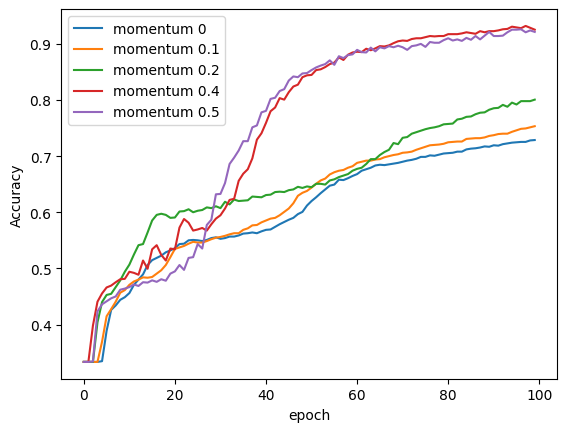

In [15]:
# Plot the Accuracy result for each term

for key, value in Results.items():
    plt.plot(value["Accuracy"], label=key)
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("Accuracy")

The accuracy seems to be proportional to the momentum term.
